# Denver Weather Analysis
## The influence of Weather on the crime rate of Denver 

### Contents
- Data Preparation
- Surronding Game Weather
- After Game Weather
- Good Weather
- Bad Weather
- Comparisons

In [85]:
import os.path
import datetime
import pylab
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
if not os.path.exists('../../data/prep/denWea_prep.csv' ):
    print("Missing dataset file")

In [87]:
ch = pd.read_csv( '../../data/prep/denWea_prep.csv', index_col="Date", parse_dates=True)
dch = pd.read_csv( '../../data/prep/denWea_dom_prep.csv', index_col="Date", parse_dates=True)

In [88]:
ch.head()

,Wind Speed,Description_x,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Description_y
Date,,,,,,,,,,
2013-01-03 14:00:00,3.0,few clouds,-11.07,3,0,3,6,Moderate,NBA,assault
2013-01-03 21:00:00,0.0,scattered clouds,-1.05,3,0,3,6,Moderate,NBA,assault
2013-01-03 22:00:00,2.0,scattered clouds,-0.69,3,0,3,6,Moderate,NBA,domestic
2013-01-04 01:00:00,2.0,few clouds,-5.92,3,0,3,6,Moderate,NBA,domestic
2013-01-06 16:00:00,0.0,sky is clear,-1.99,3,0,3,6,Moderate,NBA,domestic


In [89]:
ch['Primary Type'] = ch['Description_y']

In [90]:
ch.head()

,Wind Speed,Description_x,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Description_y,Primary Type
Date,,,,,,,,,,,
2013-01-03 14:00:00,3.0,few clouds,-11.07,3,0,3,6,Moderate,NBA,assault,assault
2013-01-03 21:00:00,0.0,scattered clouds,-1.05,3,0,3,6,Moderate,NBA,assault,assault
2013-01-03 22:00:00,2.0,scattered clouds,-0.69,3,0,3,6,Moderate,NBA,domestic,domestic
2013-01-04 01:00:00,2.0,few clouds,-5.92,3,0,3,6,Moderate,NBA,domestic,domestic
2013-01-06 16:00:00,0.0,sky is clear,-1.99,3,0,3,6,Moderate,NBA,domestic,domestic


In [91]:
ch = ch.drop(ch.columns[[9]], axis = 1)

In [92]:
ch = ch.rename(columns={'Description_x': 'Description'})

In [93]:
ch.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2013-01-03 14:00:00,3.0,few clouds,-11.07,3,0,3,6,Moderate,NBA,assault
2013-01-03 21:00:00,0.0,scattered clouds,-1.05,3,0,3,6,Moderate,NBA,assault
2013-01-03 22:00:00,2.0,scattered clouds,-0.69,3,0,3,6,Moderate,NBA,domestic
2013-01-04 01:00:00,2.0,few clouds,-5.92,3,0,3,6,Moderate,NBA,domestic
2013-01-06 16:00:00,0.0,sky is clear,-1.99,3,0,3,6,Moderate,NBA,domestic


In [94]:
dch.head()

,Overall,Weather,Domestic,Description_y
Date,,,,
2013-01-02 01:00:00,5,Bad,NBA,assault
2013-01-03 21:00:00,6,Moderate,NBA,assault
2013-01-03 22:00:00,6,Moderate,NBA,domestic
2013-01-04 01:00:00,6,Moderate,NBA,domestic
2013-01-04 03:00:00,6,Moderate,NBA,assault


In [95]:
dch['Primary Type'] = dch['Description_y']

In [96]:
dch.head()

,Overall,Weather,Domestic,Description_y,Primary Type
Date,,,,,
2013-01-02 01:00:00,5,Bad,NBA,assault,assault
2013-01-03 21:00:00,6,Moderate,NBA,assault,assault
2013-01-03 22:00:00,6,Moderate,NBA,domestic,domestic
2013-01-04 01:00:00,6,Moderate,NBA,domestic,domestic
2013-01-04 03:00:00,6,Moderate,NBA,assault,assault


In [97]:
dch = dch.drop(dch.columns[[3]], axis = 1)

In [98]:
dch.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2013-01-02 01:00:00,5,Bad,NBA,assault
2013-01-03 21:00:00,6,Moderate,NBA,assault
2013-01-03 22:00:00,6,Moderate,NBA,domestic
2013-01-04 01:00:00,6,Moderate,NBA,domestic
2013-01-04 03:00:00,6,Moderate,NBA,assault


## 2 hours before and 5 hours after

In [99]:
ch1 = ch.groupby('Primary Type')[('Primary Type')].count()
ch1.sort_values(ascending=False)

Primary Type
vandalism    1926
assault      1262
domestic      819
Name: Primary Type, dtype: int64

In [100]:
ch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(ch)

Primary Type
assault      31.494884
domestic     20.439231
vandalism    48.065885
Name: Primary Type, dtype: float64

In [101]:
ass1 = ch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(ch)

Text(0.5,1,'Total crime percentage around Games')

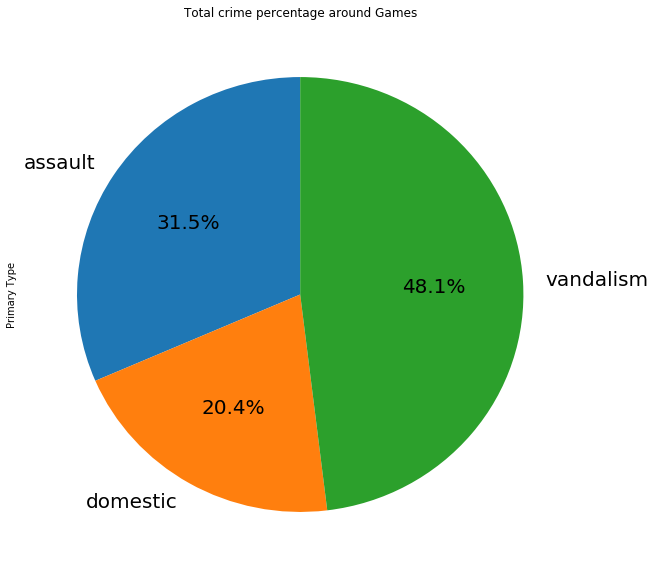

In [102]:
ass1.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Total crime percentage around Games')

# 7 hours after

In [103]:
dch1 = dch.groupby('Primary Type')[('Primary Type')].count()
dch1.sort_values(ascending=False)

Primary Type
vandalism    1656
assault      1162
domestic      755
Name: Primary Type, dtype: int64

In [104]:
dch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dch)

Primary Type
assault      32.521690
domestic     21.130702
vandalism    46.347607
Name: Primary Type, dtype: float64

In [105]:
dome = dch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dch)

Text(0.5,1,'Total crime percentage in 7 hours after game')

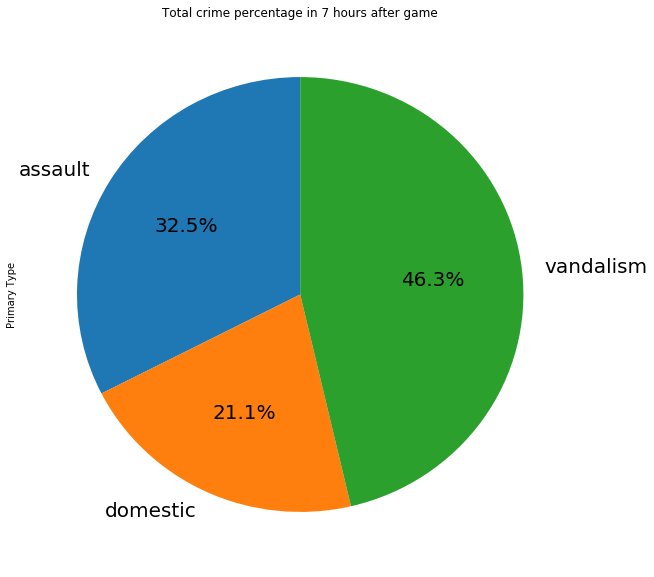

In [106]:
dome.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Total crime percentage in 7 hours after game')

# Good

In [107]:
good = ch[ch["Weather"] == "Good"]

In [108]:
good1 = good.groupby('Primary Type')[('Primary Type')].count()
good1.sort_values(ascending=False)

Primary Type
vandalism    510
assault      336
domestic     200
Name: Primary Type, dtype: int64

In [109]:
good.groupby('Primary Type')[('Primary Type')].size()*100/len(good)

Primary Type
assault      32.122371
domestic     19.120459
vandalism    48.757170
Name: Primary Type, dtype: float64

In [110]:
gd = good.groupby('Primary Type')[('Primary Type')].size()*100/len(good)

Text(0.5,1,'Good weather crime percentage surrounding game')

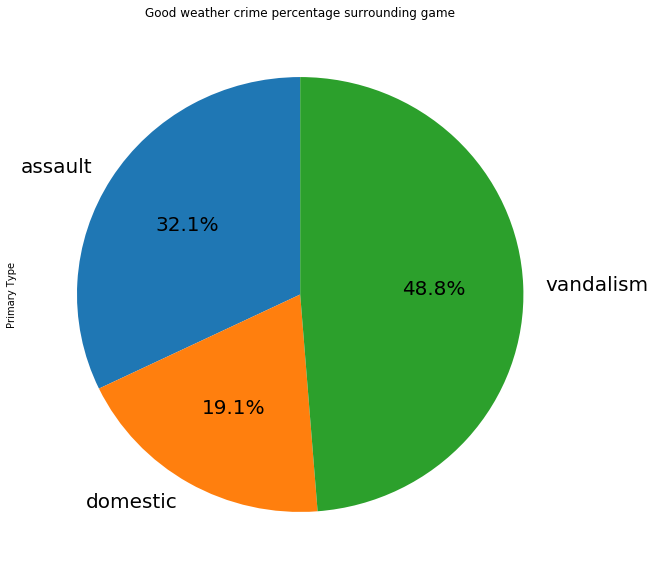

In [111]:
gd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Good weather crime percentage surrounding game')

In [112]:
good.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2013-01-19 23:00:00,3.0,few clouds,12.53,3,2,3,8,Good,NBA,assault
2013-01-20 18:00:00,0.0,sky is clear,9.91,3,2,3,8,Good,NBA,assault
2013-01-20 18:00:00,0.0,sky is clear,9.91,3,2,3,8,Good,NBA,assault
2013-01-20 19:00:00,1.0,sky is clear,10.16,3,2,3,8,Good,NBA,assault
2013-01-20 20:00:00,1.0,sky is clear,10.16,3,2,3,8,Good,NBA,domestic


In [113]:
good.groupby('Overall')[('Weather')].count()

Overall
8    928
9    118
Name: Weather, dtype: int64

In [114]:
conditions = [
    (good['Overall'] == 9)]
choices = ['Very good']
good['Heat'] = np.select(conditions, choices, default='Good')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [115]:
good.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type,Heat
Date,,,,,,,,,,,
2013-01-19 23:00:00,3.0,few clouds,12.53,3,2,3,8,Good,NBA,assault,Good
2013-01-20 18:00:00,0.0,sky is clear,9.91,3,2,3,8,Good,NBA,assault,Good
2013-01-20 18:00:00,0.0,sky is clear,9.91,3,2,3,8,Good,NBA,assault,Good
2013-01-20 19:00:00,1.0,sky is clear,10.16,3,2,3,8,Good,NBA,assault,Good
2013-01-20 20:00:00,1.0,sky is clear,10.16,3,2,3,8,Good,NBA,domestic,Good


In [116]:
vg = good[good["Heat"] == "Very good"]

In [117]:
vg1 = vg.groupby('Primary Type')[('Primary Type')].count()
vg1.sort_values(ascending=False)

Primary Type
vandalism    66
assault      29
domestic     23
Name: Primary Type, dtype: int64

In [118]:
vg.groupby('Primary Type')[('Primary Type')].size()*100/len(vg)

Primary Type
assault      24.576271
domestic     19.491525
vandalism    55.932203
Name: Primary Type, dtype: float64

In [119]:
wvg = vg.groupby('Primary Type')[('Primary Type')].size()*100/len(vg)

Text(0.5,1,'Very good weather crime percentage surrounding game')

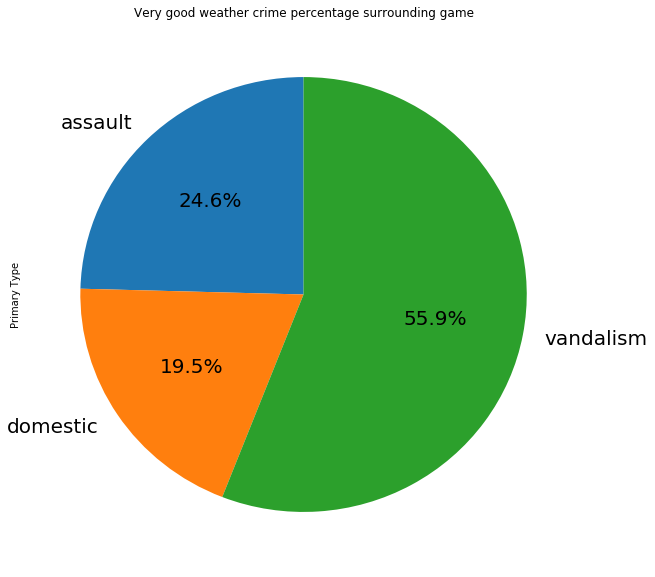

In [120]:
wvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very good weather crime percentage surrounding game')

### Good Weather and Domestic violence

In [121]:
dgood = dch[dch["Weather"] == "Good"]

In [122]:
dgood1 = dgood.groupby('Primary Type')[('Primary Type')].count()
dgood1.sort_values(ascending=False)

Primary Type
vandalism    516
assault      331
domestic     191
Name: Primary Type, dtype: int64

In [123]:
dgood.groupby('Primary Type')[('Primary Type')].size()*100/len(dgood)

Primary Type
assault      31.888247
domestic     18.400771
vandalism    49.710983
Name: Primary Type, dtype: float64

In [124]:
dgd = dgood.groupby('Primary Type')[('Primary Type')].size()*100/len(dgood)

Text(0.5,1,'Good weather crime percentage after game')

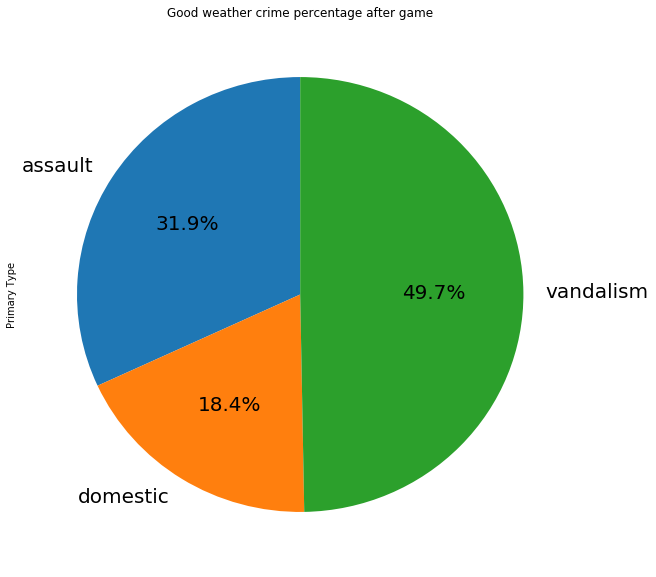

In [125]:
dgd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Good weather crime percentage after game')

In [126]:
dgood.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2013-01-20 18:00:00,8,Good,NBA,assault
2013-01-20 18:00:00,8,Good,NBA,assault
2013-01-20 19:00:00,8,Good,NBA,assault
2013-01-20 20:00:00,8,Good,NBA,domestic
2013-01-22 18:00:00,8,Good,NBA,assault


In [127]:
dgood.groupby('Overall')[('Weather')].count()

Overall
8    934
9    104
Name: Weather, dtype: int64

In [128]:
conditions = [
    (dgood['Overall'] == 9)]
choices = ['Very good']
dgood['Heat'] = np.select(conditions, choices, default='Good')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [129]:
dgood.head()

,Overall,Weather,Domestic,Primary Type,Heat
Date,,,,,
2013-01-20 18:00:00,8,Good,NBA,assault,Good
2013-01-20 18:00:00,8,Good,NBA,assault,Good
2013-01-20 19:00:00,8,Good,NBA,assault,Good
2013-01-20 20:00:00,8,Good,NBA,domestic,Good
2013-01-22 18:00:00,8,Good,NBA,assault,Good


In [130]:
dvg = dgood[dgood["Heat"] == "Very good"]

In [131]:
dvg1 = dvg.groupby('Primary Type')[('Primary Type')].count()
dvg1.sort_values(ascending=False)

Primary Type
vandalism    60
domestic     23
assault      21
Name: Primary Type, dtype: int64

In [132]:
dvg.groupby('Primary Type')[('Primary Type')].size()*100/len(dvg)

Primary Type
assault      20.192308
domestic     22.115385
vandalism    57.692308
Name: Primary Type, dtype: float64

In [133]:
wdvg = dvg.groupby('Primary Type')[('Primary Type')].size()*100/len(dvg)

Text(0.5,1,'Very good weather crime percentage after game')

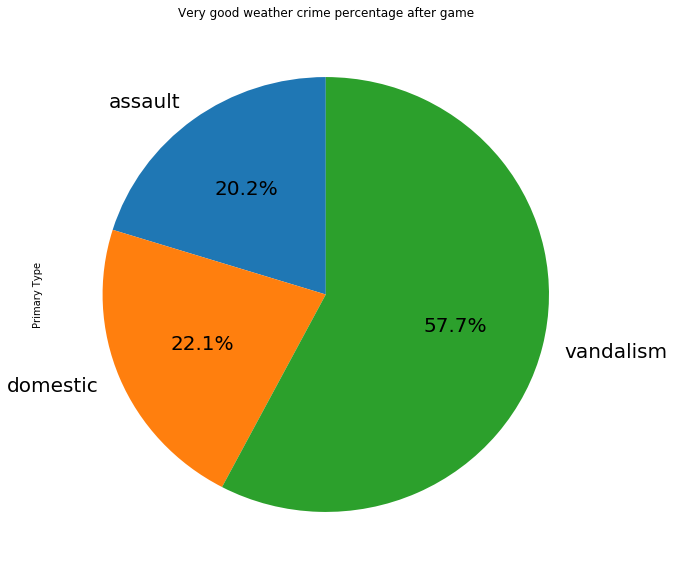

In [134]:
wdvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very good weather crime percentage after game')

# Bad

In [135]:
bad = ch[ch["Weather"] == "Bad"]

In [136]:
bad1 = bad.groupby('Primary Type')[('Primary Type')].count()
bad1.sort_values(ascending=False)

Primary Type
vandalism    756
assault      483
domestic     340
Name: Primary Type, dtype: int64

In [137]:
bad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(bad)

Primary Type
assault      30.588980
domestic     21.532616
vandalism    47.878404
Name: Primary Type, dtype: float64

In [138]:
bd = bad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(bad)

Text(0.5,1,'Bad weather crime percentage surrounding game')

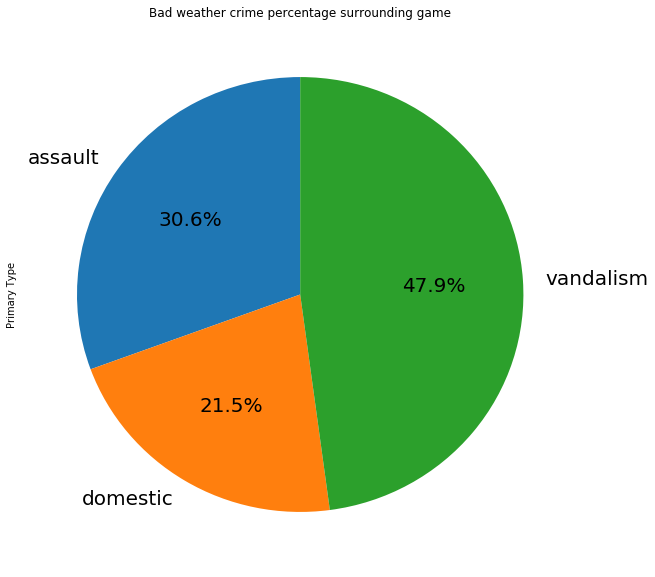

In [139]:
bd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Bad weather crime percentage surrounding game')

In [140]:
bad.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism


In [141]:
conditions = [
    (bad['Overall'] < 3)]
choices = ['Very bad']
bad['Cold'] = np.select(conditions, choices, default='Bad')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [142]:
bad.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type,Cold
Date,,,,,,,,,,,
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism,Bad
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism,Bad
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism,Bad
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism,Bad
2013-01-11 17:00:00,2.0,broken clouds,3.71,2,0,3,5,Bad,NBA,vandalism,Bad


In [143]:
vb = bad[bad["Cold"] == "Very bad"]

In [144]:
vb1 = vb.groupby('Primary Type')[('Primary Type')].count()
vb1.sort_values(ascending=False)

Primary Type
vandalism    120
assault       57
domestic      34
Name: Primary Type, dtype: int64

In [145]:
vb.groupby('Primary Type')[('Primary Type')].size()*100/len(vb)

Primary Type
assault      27.014218
domestic     16.113744
vandalism    56.872038
Name: Primary Type, dtype: float64

In [146]:
wvb = vb.groupby('Primary Type')[('Primary Type')].size()*100/len(vb)

Text(0.5,1,'Very bad weather crime percentage surrounding game')

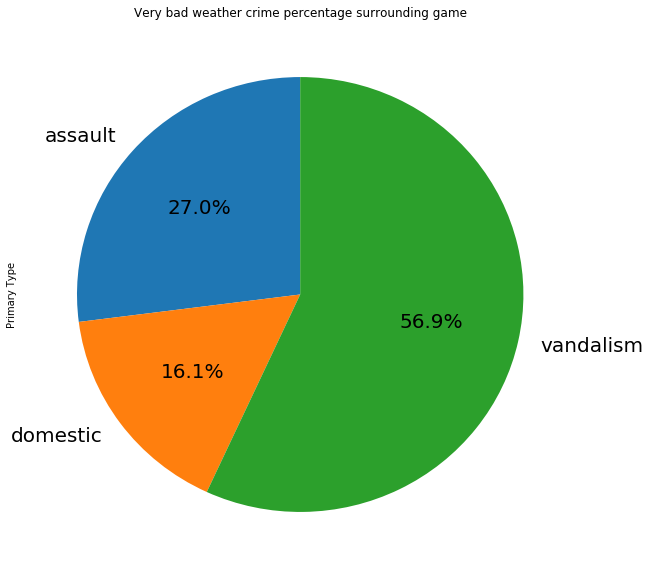

In [147]:
wvb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage surrounding game')

### Bad Weather and Domestic Violence

In [148]:
dbad = dch[dch["Weather"] == "Bad"]

In [149]:
dbad1 = dbad.groupby('Primary Type')[('Primary Type')].count()
dbad1.sort_values(ascending=False)

Primary Type
vandalism    624
assault      438
domestic     321
Name: Primary Type, dtype: int64

In [150]:
dbad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dbad)

Primary Type
assault      31.670282
domestic     23.210412
vandalism    45.119306
Name: Primary Type, dtype: float64

In [151]:
wdb = dbad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dbad)

Text(0.5,1,'Very bad weather crime percentage after game')

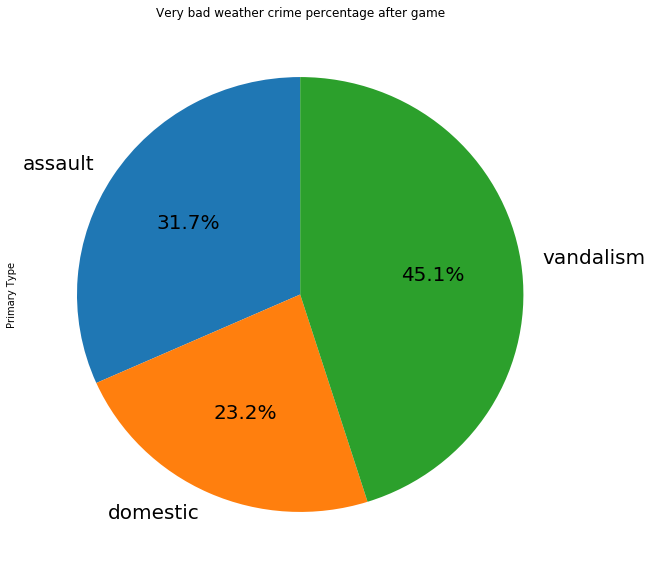

In [152]:
wdb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage after game')

In [153]:
dbad.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2013-01-02 01:00:00,5,Bad,NBA,assault
2013-01-11 21:00:00,5,Bad,NBA,domestic
2013-01-12 00:00:00,5,Bad,NBA,domestic
2013-01-12 00:00:00,5,Bad,NBA,assault
2013-01-12 01:00:00,5,Bad,NBA,assault


In [154]:
conditions = [
    (dbad['Overall'] < 3)]
choices = ['Very bad']
dbad['Cold'] = np.select(conditions, choices, default='Bad')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [155]:
dbad.head()

,Overall,Weather,Domestic,Primary Type,Cold
Date,,,,,
2013-01-02 01:00:00,5,Bad,NBA,assault,Bad
2013-01-11 21:00:00,5,Bad,NBA,domestic,Bad
2013-01-12 00:00:00,5,Bad,NBA,domestic,Bad
2013-01-12 00:00:00,5,Bad,NBA,assault,Bad
2013-01-12 01:00:00,5,Bad,NBA,assault,Bad


In [156]:
dvb = dbad[dbad["Cold"] == "Very bad"]

In [157]:
dvb1 = dvb.groupby('Primary Type')[('Primary Type')].count()
dvb1.sort_values(ascending=False)

Primary Type
vandalism    96
assault      48
domestic     36
Name: Primary Type, dtype: int64

In [158]:
dvb.groupby('Primary Type')[('Primary Type')].size()*100/len(dvb)

Primary Type
assault      26.666667
domestic     20.000000
vandalism    53.333333
Name: Primary Type, dtype: float64

In [159]:
wdvb = dvb.groupby('Primary Type')[('Primary Type')].size()*100/len(dvb)

Text(0.5,1,'Very bad weather crime percentage after game')

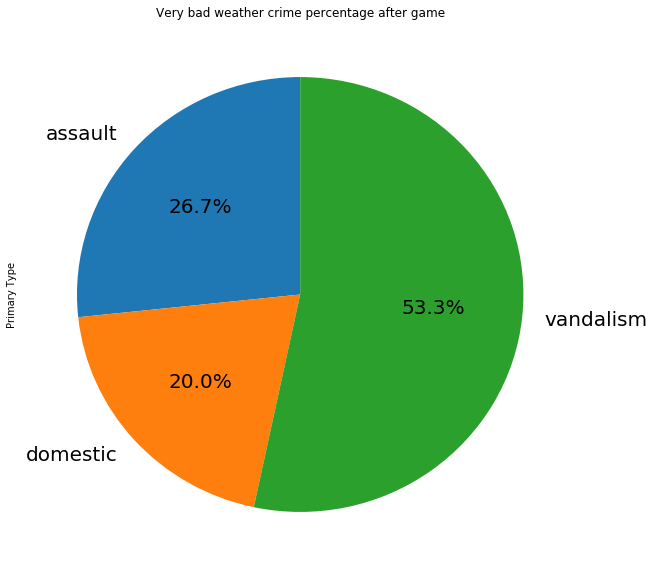

In [160]:
wdvb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage after game')

# Moderate

In [161]:
mod = ch[ch["Weather"] == "Moderate"]

In [162]:
mod1 = mod.groupby('Primary Type')[('Primary Type')].count()
mod1.sort_values(ascending=False)

Primary Type
vandalism    660
assault      443
domestic     279
Name: Primary Type, dtype: int64

In [163]:
mod.groupby('Primary Type')[('Primary Type')].size() * 100 / len(mod)

Primary Type
assault      32.054993
domestic     20.188133
vandalism    47.756874
Name: Primary Type, dtype: float64

In [164]:
md = mod.groupby('Primary Type')[('Primary Type')].size() * 100 / len(mod)

Text(0.5,1,'Moderate weather crime percentage surrounding game')

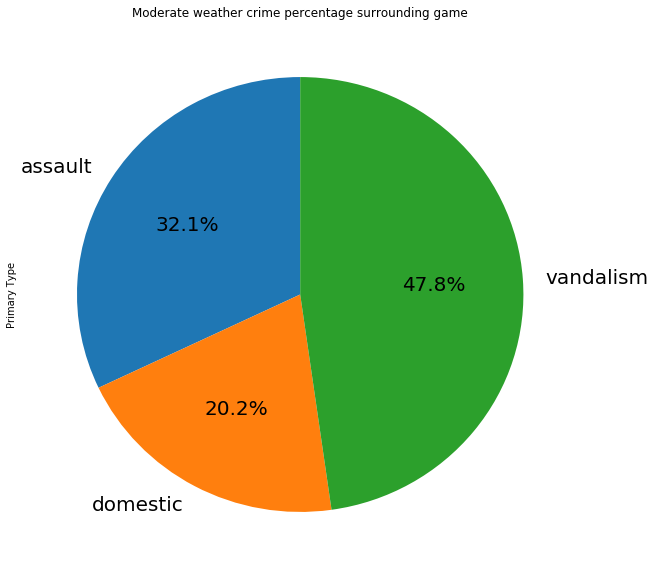

In [165]:
md.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Moderate weather crime percentage surrounding game')

# Comparison

### Surrounding Game (Focusing on Assault and Vandalism)

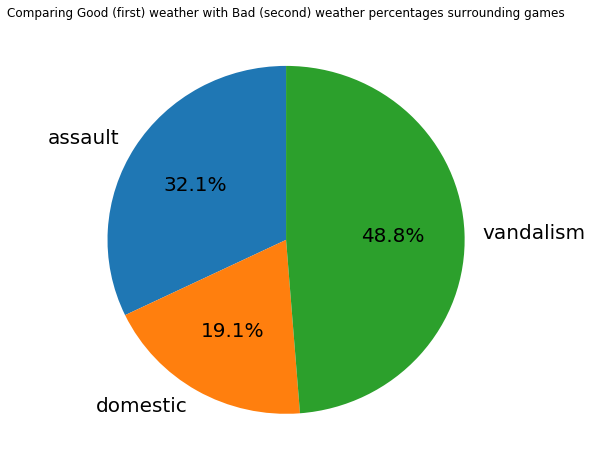

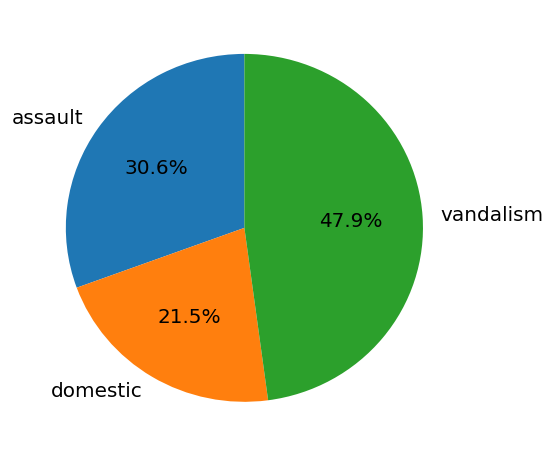

In [167]:
gd.plot(kind='pie', autopct='%1.1f%%', 
startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
plt.title('Comparing Good (first) weather with Bad (second) weather percentages surrounding games')
pylab.ylabel(' ')
plt.show()

bd.plot(kind='pie', autopct='%1.1f%%', 
startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
pylab.ylabel(' ')
plt.show()

### After Game (Focusing on Domestic Violence)

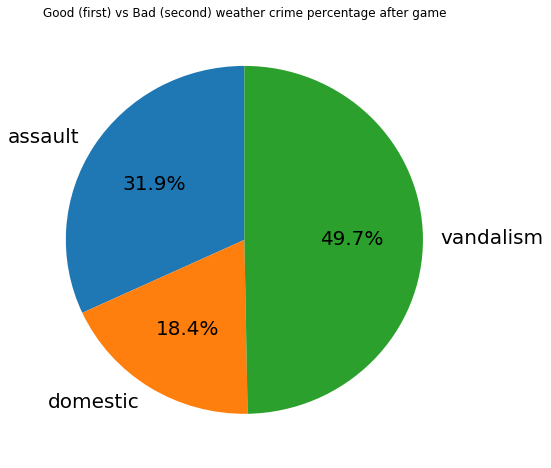

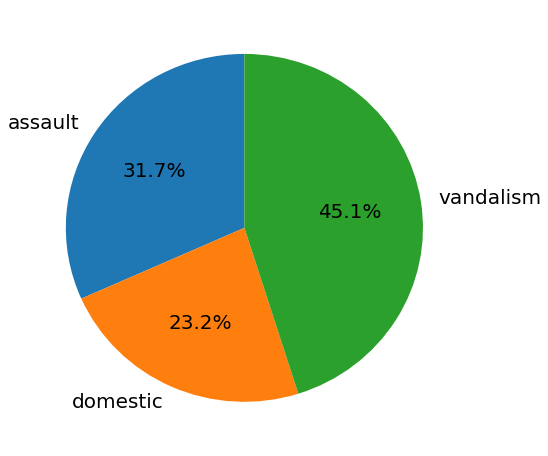

In [169]:
dgd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
plt.title('Good (first) vs Bad (second) weather crime percentage after game')
pylab.ylabel(' ')
plt.show()

wdb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
pylab.ylabel(' ')
plt.show()

### Domestic Overall

In [170]:
r9 = dch[dch["Overall"] == 9]
r9.groupby('Primary Type')[('Weather')].size() * 100 / len(r9)

Primary Type
assault      20.192308
domestic     22.115385
vandalism    57.692308
Name: Weather, dtype: float64

In [171]:
r8 = dch[dch["Overall"] == 8]
r8.groupby('Primary Type')[('Weather')].size() * 100 / len(r8)

Primary Type
assault      33.190578
domestic     17.987152
vandalism    48.822270
Name: Weather, dtype: float64

In [172]:
r7 = dch[dch["Overall"] == 7]
r7.groupby('Primary Type')[('Weather')].size() * 100 / len(r7)

Primary Type
assault      27.795527
domestic     20.447284
vandalism    51.757188
Name: Weather, dtype: float64

In [173]:
r6 = dch[dch["Overall"] == 6]
r6.groupby('Primary Type')[('Weather')].size() * 100 / len(r6)

Primary Type
assault      36.471990
domestic     21.334923
vandalism    42.193087
Name: Weather, dtype: float64

In [174]:
r5 = dch[dch["Overall"] == 5]
r5.groupby('Primary Type')[('Weather')].size() * 100 / len(r5)

Primary Type
assault      33.693694
domestic     23.063063
vandalism    43.243243
Name: Weather, dtype: float64

In [175]:
r4 = dch[dch["Overall"] == 4]
r4.groupby('Primary Type')[('Weather')].size() * 100 / len(r4)

Primary Type
assault      28.089888
domestic     24.719101
vandalism    47.191011
Name: Weather, dtype: float64

In [176]:
r3 = dch[dch["Overall"] == 3]
r3.groupby('Primary Type')[('Weather')].size() * 100 / len(r3)

Primary Type
assault      32.553191
domestic     24.042553
vandalism    43.404255
Name: Weather, dtype: float64

In [177]:
r2 = dch[dch["Overall"] == 2]
r2.groupby('Primary Type')[('Weather')].size() * 100 / len(r2)

Primary Type
assault      26.666667
domestic     20.000000
vandalism    53.333333
Name: Weather, dtype: float64

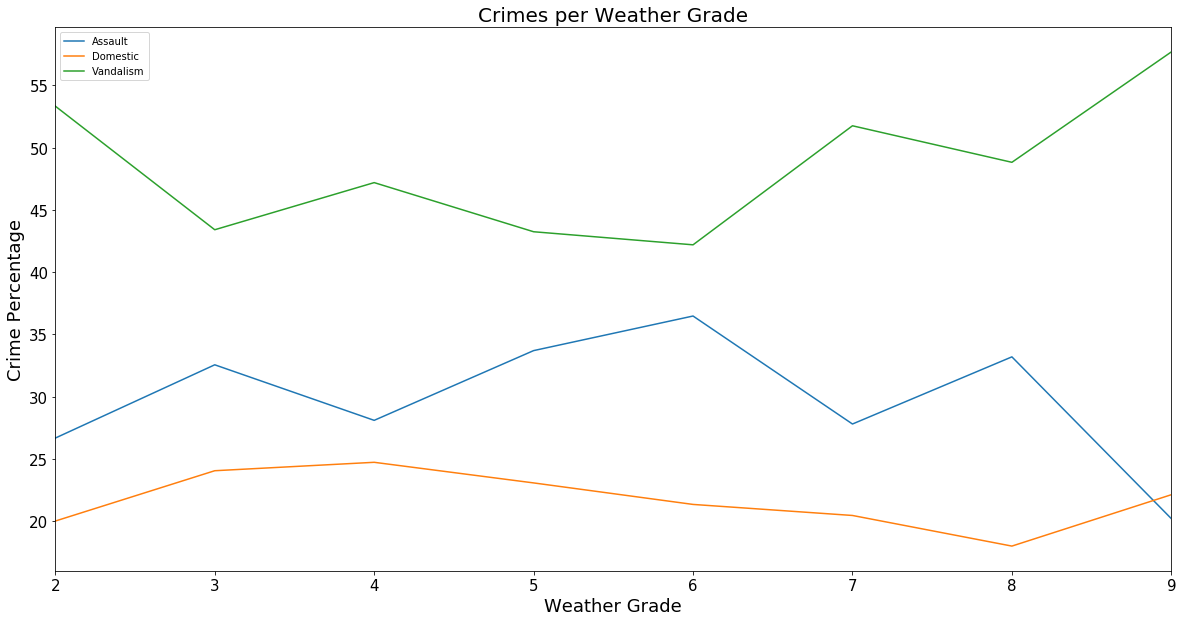

In [190]:
data = pd.DataFrame({  'Assault':[26.666667,32.553191,28.089888,33.693694,36.471990,27.795527,33.190578,20.192308], 
                     'Domestic':[20.000000,24.042553,24.719101,23.063063,21.334923,20.447284,17.987152,22.115385], 
                     'Vandalism':[53.333333,43.404255,47.191011,43.243243,42.193087,51.757188,48.822270,57.692308], }, 
                    index=range(2,10))

data.plot(figsize = (20, 10))
#ax.set(xlabel="Weather Grade", ylabel="Crime percentage")
plt.xlabel('Weather Grade', fontsize=18)
plt.ylabel('Crime Percentage', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Crimes per Weather Grade', fontsize = 20)
plt.show()

There is a reduction in domestic violence as the weather gets better, from the weather grade of 4 to 8, and then a small rise to very good weather. This rise is probably skewed as there are very few days when the weather is very good so the percentages are effected easily.

### Assault and Vandalism Overall

In [179]:
r9 = ch[ch["Overall"] == 9]
r9.groupby('Primary Type')[('Weather')].size() * 100 / len(r9)

Primary Type
assault      24.576271
domestic     19.491525
vandalism    55.932203
Name: Weather, dtype: float64

In [180]:
r8 = ch[ch["Overall"] == 8]
r8.groupby('Primary Type')[('Weather')].size() * 100 / len(r8)

Primary Type
assault      33.081897
domestic     19.073276
vandalism    47.844828
Name: Weather, dtype: float64

In [181]:
r7 = ch[ch["Overall"] == 7]
r7.groupby('Primary Type')[('Weather')].size() * 100 / len(r7)

Primary Type
assault      25.503356
domestic     19.463087
vandalism    55.033557
Name: Weather, dtype: float64

In [182]:
r6 = ch[ch["Overall"] == 6]
r6.groupby('Primary Type')[('Weather')].size() * 100 / len(r6)

Primary Type
assault      35.187166
domestic     20.534759
vandalism    44.278075
Name: Weather, dtype: float64

In [183]:
r5 = ch[ch["Overall"] == 5]
r5.groupby('Primary Type')[('Weather')].size() * 100 / len(r5)

Primary Type
assault      33.609272
domestic     21.688742
vandalism    44.701987
Name: Weather, dtype: float64

In [184]:
r4 = ch[ch["Overall"] == 4]
r4.groupby('Primary Type')[('Weather')].size() * 100 / len(r4)

Primary Type
assault      24.663677
domestic     24.215247
vandalism    51.121076
Name: Weather, dtype: float64

In [185]:
r3 = ch[ch["Overall"] == 3]
r3.groupby('Primary Type')[('Weather')].size() * 100 / len(r3)

Primary Type
assault      31.053604
domestic     22.365989
vandalism    46.580407
Name: Weather, dtype: float64

In [186]:
r2 = ch[ch["Overall"] == 2]
r2.groupby('Primary Type')[('Weather')].size() * 100 / len(r2)

Primary Type
assault      27.014218
domestic     16.113744
vandalism    56.872038
Name: Weather, dtype: float64

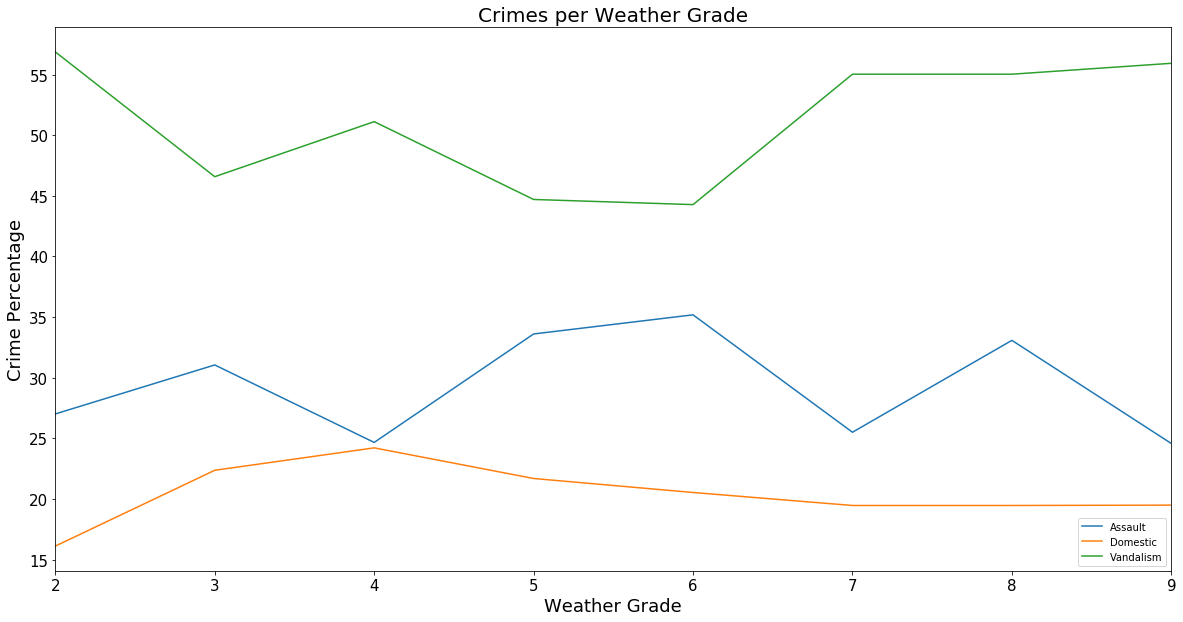

In [189]:
data = pd.DataFrame({  'Assault':[27.014218,31.053604,24.663677,33.609272,35.187166,25.503356,33.081897,24.576271], 
                     'Domestic':[16.113744,22.365989,24.215247,21.688742,20.534759,19.463087,19.463087,19.491525], 
                     'Vandalism':[56.872038,46.580407,51.121076,44.701987,44.278075,55.033557,55.033557,55.932203], }, 
                    index=range(2,10))

data.plot(figsize = (20, 10))
#ax.set(xlabel="Weather Grade", ylabel="Crime percentage")
plt.xlabel('Weather Grade', fontsize=18)
plt.ylabel('Crime Percentage', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Crimes per Weather Grade', fontsize = 20)
plt.show()

Focusing on Assault and Vandalism we see some peculiar things. It sees vandalism is at it's highest when the weather is extreme, either very bad or very good. Assault levels are inconsistent. It is nearly directly opposite to vandalism, it is at its highest in moderate weather and at its lowest during extreme weather. 